In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# csv file for bike sharing data
df = pd.read_csv("/content/drive/MyDrive/dataset/day.csv",index_col=0)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [4]:
df.isna().sum()


dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df['season'].unique()


array([1, 2, 3, 4])

In [6]:
df['season'].value_counts()


3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [19]:
df_numeric = df.drop(['dteday','season','yr','holiday','mnth'], axis=1)


In [20]:
df_numeric.head()

,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


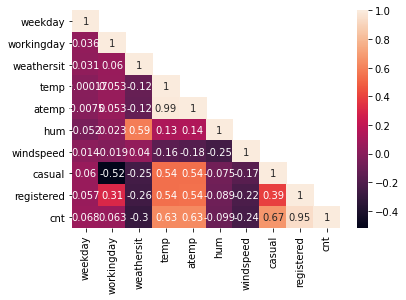

In [21]:
# Correlation Columns
mask = np.array(df_numeric.corr())

# Remove the Mirror images or keep the Lower Triangle and remove the Upper Triangle
mask[np.tril_indices_from(mask)] = False

sns.heatmap(df_numeric.corr(), mask=mask, annot=True)
plt.show()

In [22]:
df_numeric.drop(['atemp'], axis=1, inplace=True)


In [23]:
df_numeric.head()

,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,
1,6,0,2,14.110847,80.5833,10.749882,331,654,985
2,0,0,2,14.902598,69.6087,16.652113,131,670,801
3,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
4,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
5,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [62]:
X = df_numeric.drop('cnt', axis=1)
y = df_numeric['cnt']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['temp', 'hum', 'windspeed', 'casual',
         'registered']] = scaler.fit_transform(X_train[['temp', 'hum', 'windspeed', 'casual', 'registered']])

X_test[['temp', 'hum', 'windspeed', 'casual',
         'registered']] = scaler.transform(X_test[['temp', 'hum', 'windspeed', 'casual', 'registered']])

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
model.score(X_train,y_train)


0.9989038361389349

In [67]:
model.score(X_test,y_test)


0.9954262674273527

In [73]:
y_preds = model.predict(X_test)
y_preds


array([4386.40737775, 6440.50761721, 6881.41027809, 5164.76254621,
       7045.96416013, 2458.20975347, 4032.49052186, 4801.38556202,
       5073.55519991, 4841.62124485, 1966.11942668, 3670.38883935,
       6625.82380532, 1609.98134361, 7748.39037314, 1839.81602874,
        780.22942917, 2855.9164145 , 4513.21109781, 6613.61570014,
       1931.71062882, 7406.71175369, 4295.78913854, 6985.49738263,
       2255.25054115, 5789.87441528, 4722.10217888, 2217.94260328,
       5171.32437856, 7333.43380679, 4350.18120749, 3924.00477564,
       3018.17487268, 5957.61851355, 4639.32510709, 8288.81577727,
       5285.60615676, 7545.70131556, 4054.48589747, 5066.90481445,
       2315.81496208, 7513.99742511, 5215.1675844 , 3500.97032887,
       2043.38980974, 5620.60459768, 1620.85203128, 5094.23521744,
       4947.41613604, 4721.80016747, 7605.46639449, 4451.9313544 ,
       3873.7015528 , 3656.28387481,  781.87566064, 2135.70062748,
       7381.24669433, 7645.70711441, 5278.83356121, 4365.40333